In [128]:
from openai import OpenAI
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np

from Utils.embedding import get_embedding

load_dotenv()

client = OpenAI()
embeddings = OpenAIEmbeddings(model="text-embedding-3-large", chunk_size=1)
test_text_embeddings = [
    "UNA",
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht FTX?",
    "Für was steht SG1?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht PYT?",
    "Für was steht LIN?",
]


results = []
loader = PyPDFLoader(
    "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",
    extract_images=False,
)
pages = loader.load_and_split()
faiss_index = FAISS.from_documents(pages, embeddings)

<>:30: SyntaxWarning: invalid escape sequence '\M'
<>:30: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_6580\2740529757.py:30: SyntaxWarning: invalid escape sequence '\M'
  "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",


Erzeuge aus der liste "input_texts" embeddings.

In [129]:
np.array(faiss_index.similarity_search_with_score(test_text_embeddings[3], 1))

array([[Document(page_content="Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  \nSt = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  \n Seite:17 /96  \n \n Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  \n  \n 0030 6   DTM   D          11  Liefer- / Leistungsdatum  \n  \n Standard  Implementierung  \nBez  Name  St  Format   St  Format  Beispiel  Anwendung / Bemerkung  \nDTM       DTM   \nC507  Datum/Uhrzeit/Zeitspanne  M   M    \n2005  Datums- oder Uhrzeits- oder  \nZeitspannen-Funktion, Qualifier  M an..3   M an..3 +1   1 Abschluss der Serviceleistung,  \n          tatsächlicher  Zeitpunkt  \n          (Datum/Uhrzeit)  \n2380  Datum oder Uhrzeit oder  \nZeitspanne, Wert  C an..35   R n..8 :20160420  Liefer- / Leistungsdatum  \n2379  Datums- oder Uhrzeit- oder  \nZeitspannen-Format, Code  C an..3   R an..3 :102'   102  CCYYMMDD  \n Anmerkungen  Das Lieferdatum auf Kop

Erstelle Matrix mit jedem Embedding mit verändertem K parameter

In [130]:
results = np.zeros((10, 10))

for i in range(10):
    results[i, :] = np.array(
        faiss_index.similarity_search_with_score(test_text_embeddings[i], 10)
    )[:, 1]

In [124]:
results

array([[1.41384816, 1.48071742, 1.51066959, 1.55593395, 1.57626545,
        1.57992268, 1.58504605, 1.60870624, 1.61648941, 1.62761903],
       [1.05186498, 1.13098979, 1.14719772, 1.17217708, 1.18057954,
        1.19771814, 1.2546103 , 1.28102505, 1.28104091, 1.28498209],
       [1.1537497 , 1.16477025, 1.23366904, 1.25652051, 1.27258992,
        1.28578007, 1.30053544, 1.30076265, 1.32011986, 1.34371388],
       [1.10912013, 1.14657688, 1.14797163, 1.16045749, 1.16973364,
        1.17515373, 1.17614305, 1.1792624 , 1.1833899 , 1.27432323],
       [1.13734412, 1.23138011, 1.29333806, 1.33115947, 1.34161043,
        1.39487195, 1.40001965, 1.41345227, 1.41541529, 1.41839647],
       [1.16912448, 1.21298409, 1.21498847, 1.21681476, 1.24848318,
        1.25573373, 1.26524389, 1.27829504, 1.2918489 , 1.30130911],
       [1.16090751, 1.16271234, 1.16427469, 1.17080951, 1.17232394,
        1.17474508, 1.17624819, 1.17724514, 1.18341851, 1.18795311],
       [1.01852262, 1.02019119, 1.1402466

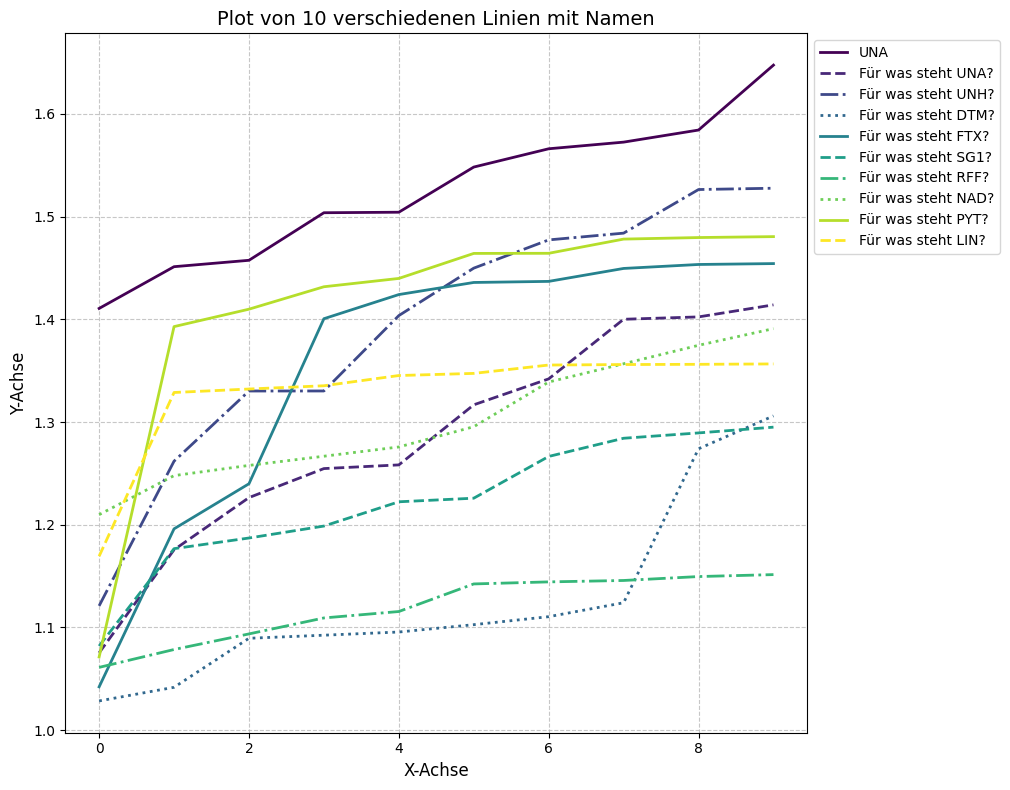

: 

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Erstelle ein numpy Array mit zufälligen Daten

# Namen für die Linien
line_names = [
    "UNA",
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht FTX?",
    "Für was steht SG1?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht PYT?",
    "Für was steht LIN?",
]

colors = plt.cm.viridis(np.linspace(0, 1, 10))
line_styles = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--"]

# Plotten der Daten
plt.figure(figsize=(12, 8))
for i in range(results.shape[0]):
    plt.plot(
        results[i],
        label=line_names[i],
        color=colors[i],
        linestyle=line_styles[i],
        linewidth=2,
    )

# Hinzufügen der Legende
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Achsenbeschriftungen und Titel
plt.xlabel("X-Achse", fontsize=12)
plt.ylabel("Y-Achse", fontsize=12)
plt.title("Plot von 10 verschiedenen Linien mit Namen", fontsize=14)

# Gitternetzlinien hinzufügen
plt.grid(True, linestyle="--", alpha=0.7)

# Layout anpassen
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Anzeigen des Plots
plt.show()